In [212]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from gensim.models import word2vec
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Embedding
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer,LancasterStemmer
from wordcloud import wordcloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import spacy
import re,string,unicodedata
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from textblob import TextBlob,Word
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from nltk.tokenize.toktok import ToktokTokenizer
from keras.preprocessing.text import one_hot
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from sklearn.preprocessing import LabelEncoder
from keras.layers import Activation,Dense,Dropout,Embedding,Flatten,Conv1D,MaxPooling1D,LSTM
from keras.callbacks import ReduceLROnPlateau,EarlyStopping
import matplotlib.pyplot as pl

In [87]:
import tensorflow as tf
gpu_options = tf.compat.v1.GPUOptions(allow_growth=True)
session = tf.compat.v1.InteractiveSession(config=tf.compat.v1.ConfigProto(gpu_options=gpu_options))

In [3]:
logistic=LogisticRegression()

In [23]:
tokenizer=ToktokTokenizer()

In [10]:
data=pd.read_csv('IMDB Dataset.csv')

In [11]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [14]:
data.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [17]:
pd.DataFrame(np.unique(data['sentiment'],return_counts=True))

<IPython.core.display.Javascript object>

,0,1
0,negative,positive
1,25000,25000


In [30]:
def remove_html(text):
    soup=BeautifulSoup(text,'html.parser')
    return soup.get_text()
    
def remove_square_brackets(text):
    return re.sub('\[[^]]*\]','',text)

def remove_special_chars(text):
    pattern=r'[^a-zA-Z0-9\s]'
    text=re.sub(pattern,'',text)
    return text

def denoise(text):
    text=remove_html(text)
    text=remove_square_brackets(text)
    text=remove_special_chars(text)
    return text


data['review']=data['review'].apply(denoise)

    
    
    
    
    
    
remove_html('<Html><Head><Body>Rishav</Body></Head></Html>')
remove_square_brackets('My name [is] Rishav ]')

'My name  Rishav ]'

In [31]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production The filming tech...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive


In [32]:
def simple_stemmer(text):
    ps=nltk.porter.PorterStemmer()
    text=' '.join([ps.stem(word) for word in text.split()])
    return text
data['review']=data['review'].apply(simple_stemmer)

In [33]:
data.head()

,review,sentiment
0,one of the other review ha mention that after ...,positive
1,A wonder littl product the film techniqu is ve...,positive
2,I thought thi wa a wonder way to spend time on...,positive
3,basic there a famili where a littl boy jake th...,negative
4,petter mattei love in the time of money is a v...,positive


In [48]:
def remove_stopwords(text):
    text=text.split()
    filtered=[tok.lower() for tok in text if tok.lower() not in stopwords.words('english')]
    filtered=' '.join(filtered)
    return filtered

In [49]:
data['review']=data['review'].apply(remove_stopwords)

In [50]:
data.head()

,review,sentiment
0,one review ha mention watch 1 oz episod youll ...,positive
1,wonder littl product film techniqu veri unassu...,positive
2,thought thi wa wonder way spend time hot summe...,positive
3,basic famili littl boy jake think zombi hi clo...,negative
4,petter mattei love time money visual stun film...,positive


In [117]:
data['sentiment'][data['sentiment']=='positive']=1
data['sentiment'][data['sentiment']=='negative']=0


In [156]:
data.head()

,review,sentiment
0,one review ha mention watch 1 oz episod youll ...,1
1,wonder littl product film techniqu veri unassu...,1
2,thought thi wa wonder way spend time hot summe...,1
3,basic famili littl boy jake think zombi hi clo...,0
4,petter mattei love time money visual stun film...,1


In [150]:
cv=CountVectorizer(min_df=0,max_df=1,binary=False,ngram_range=(1,3))

In [157]:
cv_train_reviews=data.review[:40000]
cv_train_sentiment=data.sentiment[:40000].astype(int)
cv_test_reviews=data.review[40000:]
cv_test_sentiment=data.sentiment[40000:].astype(int)
cv_train_reviews.shape,cv_train_reviews.shape,cv_test_reviews.shape,cv_train_sentiment.shape

((40000,), (40000,), (10000,), (40000,))

In [158]:
cv_train_reviews=cv.fit_transform(cv_train_reviews)
cv_test_reviews=cv.transform(cv_test_reviews)

In [127]:
cv_train_reviews.shape,cv_test_reviews.shape

((40000, 6208633), (10000, 6208633))

In [132]:
cv_train_sentiment.shape

(40000,)

In [131]:
data['sentiment'].nunique()

2

In [159]:
tv=TfidfVectorizer(min_df=0,max_df=1,use_idf=True,ngram_range=(1,3))
tv_train_reviews=data.review[:40000]
tv_train_sentiment=data.sentiment[:40000].astype(int)
tv_test_reviews=data.review[40000:]
tv_test_sentiment=data.sentiment[40000:].astype(int)
tv_train_reviews.shape,tv_train_reviews.shape,tv_test_reviews.shape,tv_train_sentiment.shape


((40000,), (40000,), (10000,), (40000,))

In [160]:
tv_train_reviews=tv.fit_transform(tv_train_reviews)
tv_test_reviews=tv.transform(tv_test_reviews)
tv_train_reviews.shape,tv_test_reviews.shape

((40000, 6208633), (10000, 6208633))

In [161]:
lr=LogisticRegression()
lr_cv=lr.fit(cv_train_reviews,list(cv_train_sentiment))
lr_cv.score(cv_train_reviews,cv_train_sentiment),lr_cv.score(cv_test_reviews,cv_test_sentiment)

(0.996275, 0.5981)

In [162]:
lr=LogisticRegression()
lr_tv=lr.fit(tv_train_reviews,tv_train_sentiment)
lr_tv.score(tv_train_reviews,tv_train_sentiment),lr_tv.score(tv_test_reviews,tv_test_sentiment)

(0.996275, 0.7498)

In [98]:
onehot_rep=[one_hot(words,10000) for words in data['review']]

In [109]:
len(max(onehot_rep,key=len))

1483

In [111]:
len(onehot_rep)

50000

In [110]:
sent_len=1500
embedded=pad_sequences(onehot_rep,padding='pre',maxlen=sent_len)
embedded[:5]

array([[   0,    0,    0, ..., 5095,  303, 3332],
       [   0,    0,    0, ..., 1263, 8028, 2633],
       [   0,    0,    0, ..., 7344, 9231, 3351],
       [   0,    0,    0, ..., 3516, 6082, 7631],
       [   0,    0,    0, ..., 6843, 8537, 5599]])

In [170]:
df_train,df_test=train_test_split(data,test_size=0.3,random_state=42)

In [175]:
documents=[text.split() for text in df_train.review]

In [176]:
print(documents[0])

['much', 'love', 'train', 'couldnt', 'stomach', 'thi', 'movi', 'premis', 'one', 'could', 'steal', 'locomot', 'drive', 'arkansa', 'chicago', 'without', 'hit', 'anoth', 'train', 'along', 'way', 'ha', 'right', 'imposs', 'plot', 'line', 'hit', 'board', 'imagin', 'two', 'disgruntl', 'nasa', 'employe', 'steal', 'crawler', 'tote', 'shuttl', 'fro', 'drive', 'new', 'york', 'get', 'ideahav', 'said', 'nice', 'tri', 'wilford', 'brime', 'hi', 'quaker', 'oat', 'best', 'levon', 'helm', 'turn', 'good', 'perform', 'hi', 'dimwit', 'wellmean', 'sidekick', 'bob', 'balaban', 'suitabl', 'wormi', 'corpor', 'guy', 'littl', 'guy', 'take', 'goliath', 'stori', 'get', 'anoth', 'air']


In [185]:
w2v_size=300
w2v_window=7
w2v_epoch=32
w2v_min_count=10
seq_len=300

In [178]:
w2v_model=gensim.models.word2vec.Word2Vec(size=w2v_size,
                                         window=w2v_window,
                                         min_count=w2v_min_count,
                                         workers=12)

<IPython.core.display.Javascript object>

In [179]:
w2v_model.build_vocab(documents)

In [180]:
words=w2v_model.wv.vocab.keys()
vocab_size=len(words)
vocab_size 

17576

In [181]:
w2v_model.train(documents,total_examples=len(documents),epochs=w2v_epoch)

(125022453, 143353856)

In [184]:
tokenizer=Tokenizer()
tokenizer.fit_on_texts(df_train.review)
vocab_size=len(tokenizer.word_index)+1

In [186]:
X_train=pad_sequences(tokenizer.texts_to_sequences(df_train.review),maxlen=seq_len)
X_test=pad_sequences(tokenizer.texts_to_sequences(df_test.review),maxlen=seq_len)

In [190]:
encoder=LabelEncoder()
encoder.fit(df_train.sentiment.tolist())
y_train=encoder.transform(df_train.sentiment.tolist())
y_test=encoder.transform(df_test.sentiment.tolist())

In [191]:
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)

In [192]:
X_train.shape,y_train.shape

((35000, 300), (35000, 1))

In [193]:
embedding_matrix=np.zeros((vocab_size,w2v_size))
for word,i in tokenizer.word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i]=w2v_model[word]
        
embedding_matrix.shape

<IPython.core.display.Javascript object>

C:\Users\rissu\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


(141830, 300)

In [194]:
embedding_layer=Embedding(vocab_size,w2v_size,weights=[embedding_matrix],
                         input_length=seq_len,trainable=False)

In [203]:
model=Sequential()
model.add(embedding_layer)
model.add(Dropout(0.5))
model.add(LSTM(100,dropout=0.2,recurrent_dropout=0.2))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 300, 300)          42549000  
_________________________________________________________________
dropout_3 (Dropout)          (None, 300, 300)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               160400    
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 101       
Total params: 42,709,501
Trainable params: 160,501
Non-trainable params: 42,549,000
_________________________________________________________________


In [204]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [205]:
callbacks=[ReduceLROnPlateau(monitor='val_loss',patience=5,cooldown=0),
          EarlyStopping(monitor='val_acc',min_delta=1e-4,patience=5)]

In [214]:
history=model.fit(X_train,y_train,batch_size=800,epochs=20,
                 validation_split=0.1,verbose=1,callbacks=callbacks)

Train on 31500 samples, validate on 3500 samples
Epoch 1/20
31500/31500 [==============================] - 18s 564us/step - loss: 0.3016 - accuracy: 0.8733 - val_loss: 0.2798 - val_accuracy: 0.8851
Epoch 2/20


C:\Users\rissu\anaconda3\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy,lr
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


31500/31500 [==============================] - 18s 566us/step - loss: 0.2960 - accuracy: 0.8759 - val_loss: 0.2642 - val_accuracy: 0.8909
Epoch 3/20
31500/31500 [==============================] - 18s 567us/step - loss: 0.2844 - accuracy: 0.8817 - val_loss: 0.2713 - val_accuracy: 0.8874
Epoch 4/20
31500/31500 [==============================] - 18s 572us/step - loss: 0.2867 - accuracy: 0.8793 - val_loss: 0.2830 - val_accuracy: 0.8929
Epoch 5/20
31500/31500 [==============================] - 18s 569us/step - loss: 0.2853 - accuracy: 0.8803 - val_loss: 0.2583 - val_accuracy: 0.8923
Epoch 6/20
31500/31500 [==============================] - 18s 570us/step - loss: 0.2769 - accuracy: 0.8854 - val_loss: 0.2597 - val_accuracy: 0.8906
Epoch 7/20
31500/31500 [==============================] - 18s 570us/step - loss: 0.2717 - accuracy: 0.8866 - val_loss: 0.2571 - val_accuracy: 0.8914
Epoch 8/20
31500/31500 [==============================] - 18s 575us/step - loss: 0.2669 - accuracy: 0.8886 - val_loss

In [215]:
batch_size=256
score=model.evaluate(X_test,y_test,batch_size=batch_size)
score[1],score[0]


15000/15000 [==============================] - 4s 273us/step


(0.9037333130836487, 0.2423040050347646)

In [216]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

<IPython.core.display.Javascript object>

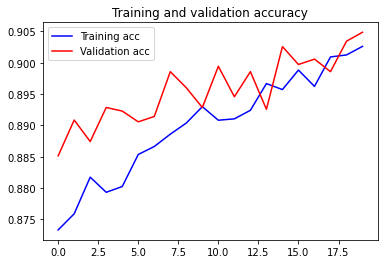

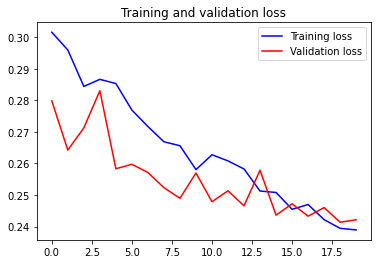

In [217]:
epochs = range(len(acc))
 
pl.plot(epochs, acc, 'b', label='Training acc')
pl.plot(epochs, val_acc, 'r', label='Validation acc')
pl.title('Training and validation accuracy')
pl.legend()
 
pl.figure()
 
pl.plot(epochs, loss, 'b', label='Training loss')
pl.plot(epochs, val_loss, 'r', label='Validation loss')
pl.title('Training and validation loss')
pl.legend()
 
plt.show()